JavaScript rendering on a large scale using python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data1 = pd.read_csv('C:/users/owner/desktop/Text_only.csv')
df_text = pd.DataFrame(data1)
data2 = pd.read_csv('C:/users/owner/desktop/javascript_only.csv')
df_javascript = pd.DataFrame(data2)

In [17]:
dftext = df_text[['Address', 'Status Code', 'Word Count', 'Outlinks', 
                  'Unique Outlinks', 'Inlinks', 'Unique Inlinks',
                  'Canonical Link Element 1']].copy()

In [20]:
dfjavascript = df_javascript[['Address', 'Status Code', 'Word Count', 'Outlinks', 
                             'Unique Outlinks', 'Inlinks', 'Unique Inlinks',
                             'Canonical Link Element 1']].copy()

In [31]:
df = pd.merge(dftext, dfjavascript, left_on='Address',
              right_on='Address', how='outer')

In [43]:
#Check the differences from features of each crawl.
df['Wordcount_diff'] = df['Word Count_y'] - df['Word Count_x']
df['Outlinks_diff'] = df['Outlinks_y'] - df['Outlinks_x']
df['Unique_Outlinks_diff'] = df['Unique Outlinks_y'] - df['Unique Outlinks_x']
df['Inlinks_diff'] = df['Inlinks_y'] - df['Inlinks_x']

df['Wordcount_diff']

0     0.0
1     4.0
2     0.0
3     0.0
4     0.0
     ... 
64    NaN
65    NaN
66    NaN
67    NaN
68    NaN
Name: Wordcount_diff, Length: 69, dtype: float64

In [45]:
#verify the equivalence of the canonical links.
df['equal_canonicals'] = np.where((df['Canonical Link Element 1_y'] == df['Canonical Link Element 1_x']), 'yes', 'no')


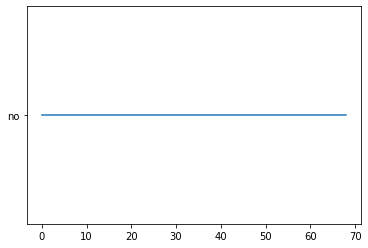

In [44]:
plt.plot(df['equal_canonicals'])
plt.show()